### DSC 478 PROJECT 

#### Project on Melbourne Housing Market                                         
                                            By - Vismay Patel

#### Primary objective: 

Discriptive statistics.

Visualizing and graphing the relation between the attributes to better understand the dataset.

Using Regression methods to find out the best model that predicts housing price in melbourne housing dataset.

Perform KMeans clustering using silhouette method to find out interpretation, validation and consistency of clusters within data.

### Data Cleaning and  Descriptive statistics

In [451]:
# First let us import all the essential libraries 

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [452]:
# To perform the initial analysis and cleaning, first we will import the FULL Melbourne Housing dataset.

# We have used na_values = [?], to replace 'NaN' with the blank or empty values in the dataset.

house_data = pd.read_csv('C:/Users/visma/Anaconda3/DSC 478/DSC 478 Project/Melbourne_housing_FULL.csv', na_values=['?'])
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.50,"3,067.00",...,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
2,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.50,"3,067.00",...,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,"4,019.00"
4,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
5,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,1.00,94.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
6,Abbotsford,55a Park St,4,h,"1,600,000.00",VB,Nelson,4/06/2016,2.50,"3,067.00",...,1.00,2.00,120.00,142.00,"2,014.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"
7,Abbotsford,16 Maugie St,4,h,nan,SN,Nelson,6/08/2016,2.50,"3,067.00",...,2.00,2.00,400.00,220.00,"2,006.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
8,Abbotsford,53 Turner St,2,h,nan,S,Biggin,6/08/2016,2.50,"3,067.00",...,1.00,2.00,201.00,nan,"1,900.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
9,Abbotsford,99 Turner St,2,h,nan,S,Collins,6/08/2016,2.50,"3,067.00",...,2.00,1.00,202.00,nan,"1,900.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"


In [453]:
# The shape of the dataset, consists of 34854 rows and 21 columns

house_data.shape

(34857, 21)

### Details of the attributes before cleaning/filling missing values.

In [454]:
# Now we will look at the information function which will provide the details like, total entries in columns,  etc.
house_data.info()

# another way of finding the number of columns that fall into a specific datatype category is:
# house_data.dtype.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

Based on the represented by the information function, we can get the following insight:

Most important observarion that we can make from the dataset is, there are
numerous missing values in the dataset.
WE will remove these missing values in the next step.
1. Total entries of raw data: 34856
2. Total number of data columns: 21
3. Column with integer datatype: 1
4. Column with float datatype: 12
5. Column with object datatype: 8

In [455]:
# Anothe way of checking the missing values is as follows:
house_data[house_data.isnull().any(axis=1)] 


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.50,"3,067.00",...,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.50,"3,067.00",...,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,"4,019.00"
5,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,1.00,94.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
7,Abbotsford,16 Maugie St,4,h,nan,SN,Nelson,6/08/2016,2.50,"3,067.00",...,2.00,2.00,400.00,220.00,"2,006.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
8,Abbotsford,53 Turner St,2,h,nan,S,Biggin,6/08/2016,2.50,"3,067.00",...,1.00,2.00,201.00,nan,"1,900.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
9,Abbotsford,99 Turner St,2,h,nan,S,Collins,6/08/2016,2.50,"3,067.00",...,2.00,1.00,202.00,nan,"1,900.00",Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
10,Abbotsford,129 Charles St,2,h,"941,000.00",S,Jellis,7/05/2016,2.50,"3,067.00",...,1.00,0.00,181.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,"4,019.00"
12,Abbotsford,121/56 Nicholson St,2,u,nan,PI,Biggin,7/11/2016,2.50,"3,067.00",...,2.00,1.00,"4,292.00",82.00,"2,009.00",Yarra City Council,-37.81,145.00,Northern Metropolitan,"4,019.00"
13,Abbotsford,17 Raphael St,4,h,nan,W,Biggin,7/11/2016,2.50,"3,067.00",...,2.00,0.00,230.00,147.00,"1,860.00",Yarra City Council,-37.81,144.99,Northern Metropolitan,"4,019.00"


All the above instances contain missing values. Now we will remove these values

### Removing missing values 

In [456]:
# The first column to be cleaned is Price, dtype = float
# We will replace all the missing values with the mean of the existing values

price_mean = house_data.Price.mean()
house_data.Price.fillna(price_mean, axis = 0, inplace = True)


In [457]:
# Next column Distance dtype = float

Dist_mean = house_data.Distance.mean()
house_data.Distance.fillna(Dist_mean, axis = 0, inplace = True)

In [458]:
# Column = Postcode, dtype = float

PC_mean = house_data.Postcode.mean()
house_data.Postcode.fillna(PC_mean, axis = 0, inplace = True)

In [459]:
# Column Bedroom2, dtype = float

Bedrm2_mean = house_data.Bedroom2.mean()
house_data.Bedroom2.fillna(Bedrm2_mean, axis = 0, inplace = True)

In [460]:
# Column Bathroom, dtype = float

bath_mean = house_data.Bathroom.mean()
house_data.Bathroom.fillna(bath_mean,axis = 0, inplace=True)

In [461]:
# Column Car, dtype = float

car_mean = house_data.Car.mean()
house_data.Car.fillna(car_mean, axis = 0, inplace = True)

In [462]:
# Column Landsize, dtype = float 

landsiz_mean = house_data.Landsize.mean()
house_data.Landsize.fillna(landsiz_mean, axis = 0, inplace = True)

In [463]:
# Column Building Area, dtype = float

bldarea_mean = house_data.BuildingArea.mean()
house_data.BuildingArea.fillna(bldarea_mean, axis = 0, inplace=True)

In [464]:
# Column YearBuilt, dtype = float

yrbuilt_mean = house_data.YearBuilt.mean()
house_data.YearBuilt.fillna(yrbuilt_mean, axis = 0, inplace = True)

In [465]:
# Column CouncilArea, dtype = object(categorical variable)
# For categorical variable we delete or drop the missing values 

house_data.drop(house_data[house_data.CouncilArea.isnull()].index, axis = 0, inplace = True)

In [466]:
house_data.drop(house_data[house_data.Regionname.isnull()].index, axis = 0, inplace = True)

In [467]:
# Column Latitude, dtype = float

Lat_mean = house_data.Lattitude.mean()
house_data.Lattitude.fillna(Lat_mean, axis = 0, inplace = True)

In [468]:
# Column Longtitude, dtype = float

long_mean = house_data.Longtitude.mean()
house_data.Longtitude.fillna(long_mean, axis = 0, inplace = True)

In [469]:
PropertyCntmean = house_data.Propertycount.mean()
house_data.Propertycount.fillna(PropertyCntmean, axis = 0, inplace = True)

In [470]:
# Check the if the data still contains any missing value

house_data[house_data.isnull().any(axis=1)] 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


After cleaning the data there are zero(0) missing values in the dataset.

In [471]:

house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34854 non-null object
Address          34854 non-null object
Rooms            34854 non-null int64
Type             34854 non-null object
Price            34854 non-null float64
Method           34854 non-null object
SellerG          34854 non-null object
Date             34854 non-null object
Distance         34854 non-null float64
Postcode         34854 non-null float64
Bedroom2         34854 non-null float64
Bathroom         34854 non-null float64
Car              34854 non-null float64
Landsize         34854 non-null float64
BuildingArea     34854 non-null float64
YearBuilt        34854 non-null float64
CouncilArea      34854 non-null object
Lattitude        34854 non-null float64
Longtitude       34854 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.9+ M

#### From the above code we can say that the missing values have been eleminated. 

#### Since the dataset consists of float and object values, we need to change some parameters/attributes which do not need to be float value. 
Following attributes that need to be changed to integer type [ Postcode, Bedroom2, Bathroom, car, YearBuilt, Property count ]

In [472]:
# changing data type

house_data['Postcode'] = house_data['Postcode'].astype('int64')
house_data['Bedroom2'] = house_data['Bedroom2'].astype('int64')
house_data['Bathroom'] = house_data['Bathroom'].astype('int64')
house_data['Car'] = house_data['Car'].astype('int64')
house_data['YearBuilt'] = house_data['YearBuilt'].astype('int64')
house_data['Propertycount'] = house_data['Propertycount'].astype('int64')

In [473]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34854 non-null object
Address          34854 non-null object
Rooms            34854 non-null int64
Type             34854 non-null object
Price            34854 non-null float64
Method           34854 non-null object
SellerG          34854 non-null object
Date             34854 non-null object
Distance         34854 non-null float64
Postcode         34854 non-null int64
Bedroom2         34854 non-null int64
Bathroom         34854 non-null int64
Car              34854 non-null int64
Landsize         34854 non-null float64
BuildingArea     34854 non-null float64
YearBuilt        34854 non-null int64
CouncilArea      34854 non-null object
Lattitude        34854 non-null float64
Longtitude       34854 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null int64
dtypes: float64(6), int64(7), object(8)
memory usage: 5.9+ MB


From the above information we can see that float64 attributes have changed to 
int64 data type

Now we will transfer the clean data into another text file. This is done to remove the indexing problem and to valudate the total number of entries to 34854.

In [474]:
# Loading the data in another file

clean_house = house_data.to_csv('D:/DEPAUL/Depaul 5th quarter (AUTUMN)/DSC 478/PROJECT/int64index_CLEAN.csv', index = False)

In [475]:
# Declaring a new variable and assigning the clean data set to the variable.

clean_house = pd.read_csv('D:/DEPAUL/Depaul 5th quarter (AUTUMN)/DSC 478/PROJECT/int64index_CLEAN.csv')
clean_house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,"1,050,173.34",SS,Jellis,3/09/2016,2.50,3067,...,1,1,126.00,160.26,1965,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,3067,...,1,1,202.00,160.26,1965,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,3067,...,1,0,156.00,79.00,1900,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,"1,050,173.34",VB,Rounds,4/02/2016,2.50,3067,...,2,1,0.00,160.26,1965,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,3067,...,2,0,134.00,150.00,1900,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,3067,...,2,1,94.00,160.26,1965,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,"1,600,000.00",VB,Nelson,4/06/2016,2.50,3067,...,1,2,120.00,142.00,2014,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,"1,050,173.34",SN,Nelson,6/08/2016,2.50,3067,...,2,2,400.00,220.00,2006,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,"1,050,173.34",S,Biggin,6/08/2016,2.50,3067,...,1,2,201.00,160.26,1900,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019
9,Abbotsford,99 Turner St,2,h,"1,050,173.34",S,Collins,6/08/2016,2.50,3067,...,2,1,202.00,160.26,1900,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019


In [476]:
# Now the values of the index are in the right shap.

clean_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34854 entries, 0 to 34853
Data columns (total 21 columns):
Suburb           34854 non-null object
Address          34854 non-null object
Rooms            34854 non-null int64
Type             34854 non-null object
Price            34854 non-null float64
Method           34854 non-null object
SellerG          34854 non-null object
Date             34854 non-null object
Distance         34854 non-null float64
Postcode         34854 non-null int64
Bedroom2         34854 non-null int64
Bathroom         34854 non-null int64
Car              34854 non-null int64
Landsize         34854 non-null float64
BuildingArea     34854 non-null float64
YearBuilt        34854 non-null int64
CouncilArea      34854 non-null object
Lattitude        34854 non-null float64
Longtitude       34854 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null int64
dtypes: float64(6), int64(7), object(8)
memory usage: 5.6+ MB


#### Data type od the attributes

In [477]:
# Now let us find out the names of columns that fall into each datatype category, i.e integer, float, object.
# Column with data type integer.

clean_house.select_dtypes(include = ['int64']).head()

,Rooms,Postcode,Bedroom2,Bathroom,Car,YearBuilt,Propertycount
0,2,3067,2,1,1,1965,4019
1,2,3067,2,1,1,1965,4019
2,2,3067,2,1,0,1900,4019
3,3,3067,3,2,1,1965,4019
4,3,3067,3,2,0,1900,4019


In [478]:
# Columns with data type float

clean_house.select_dtypes(include = ['float']).head()

,Price,Distance,Landsize,BuildingArea,Lattitude,Longtitude
0,"1,050,173.34",2.50,126.00,160.26,-37.80,145.00
1,"1,480,000.00",2.50,202.00,160.26,-37.80,145.00
2,"1,035,000.00",2.50,156.00,79.00,-37.81,144.99
3,"1,050,173.34",2.50,0.00,160.26,-37.81,145.01
4,"1,465,000.00",2.50,134.00,150.00,-37.81,144.99


In [479]:
# Columns with data type object

clean_house.select_dtypes(include = ['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan


### Descriptive statistics

In [480]:
# computing describe.info

clean_house.describe(include = 'all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34854,34854,"34,854.00",34854,"34,854.00",34854,34854,34854,"34,854.00","34,854.00",...,"34,854.00","34,854.00","34,854.00","34,854.00","34,854.00",34854,"34,854.00","34,854.00",34854,"34,854.00"
unique,350,34006,nan,3,nan,9,388,78,nan,nan,...,nan,nan,nan,nan,nan,33,nan,nan,8,nan
top,Reservoir,5 Charles St,nan,h,nan,S,Jellis,28/10/2017,nan,nan,...,nan,nan,nan,nan,nan,Boroondara City Council,nan,nan,Southern Metropolitan,nan
freq,844,6,nan,23978,nan,19743,3358,1119,nan,nan,...,nan,nan,nan,nan,nan,3675,nan,nan,11836,nan
mean,NaN,NaN,3.03,NaN,"1,050,202.02",NaN,NaN,NaN,11.19,"3,116.07",...,1.48,1.55,593.60,160.26,"1,965.13",NaN,-37.81,145.00,NaN,"7,572.89"
std,NaN,NaN,0.97,NaN,"567,151.16",NaN,NaN,NaN,6.79,109.03,...,0.69,0.93,"2,763.81",251.95,24.93,NaN,0.08,0.11,NaN,"4,428.09"
min,NaN,NaN,1.00,NaN,"85,000.00",NaN,NaN,NaN,0.00,"3,000.00",...,0.00,0.00,0.00,0.00,"1,196.00",NaN,-38.19,144.42,NaN,83.00
25%,NaN,NaN,2.00,NaN,"695,000.00",NaN,NaN,NaN,6.40,"3,051.00",...,1.00,1.00,357.00,160.00,"1,965.00",NaN,-37.85,144.96,NaN,"4,385.00"
50%,NaN,NaN,3.00,NaN,"1,050,173.34",NaN,NaN,NaN,10.30,"3,103.00",...,1.00,1.00,593.60,160.26,"1,965.00",NaN,-37.81,145.00,NaN,"6,763.00"
75%,NaN,NaN,4.00,NaN,"1,150,000.00",NaN,NaN,NaN,14.00,"3,156.00",...,2.00,2.00,598.00,160.26,"1,965.00",NaN,-37.77,145.05,NaN,"10,412.00"


##### Now we will look at the graphical representation of the numeric and categorical attributes

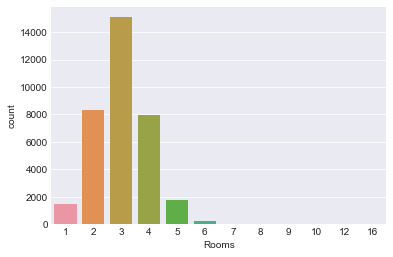

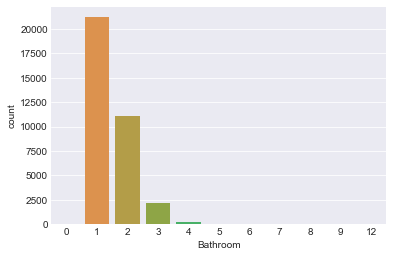

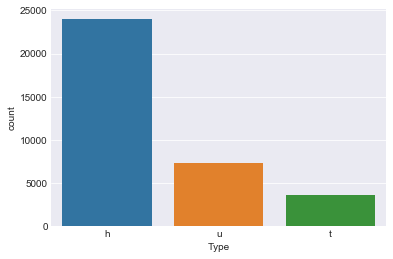

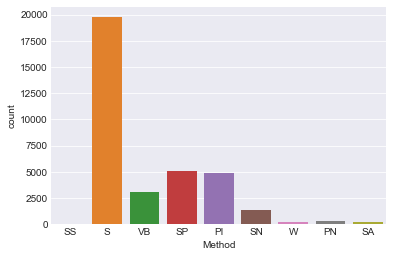

In [302]:
# Plotting two categorical attributes and numerical attributes

data = ['Rooms', 'Bathroom', 'Type', 'Method']

for i in data:
    plt.figure()
    sns.countplot(x = i, data = clean_house)

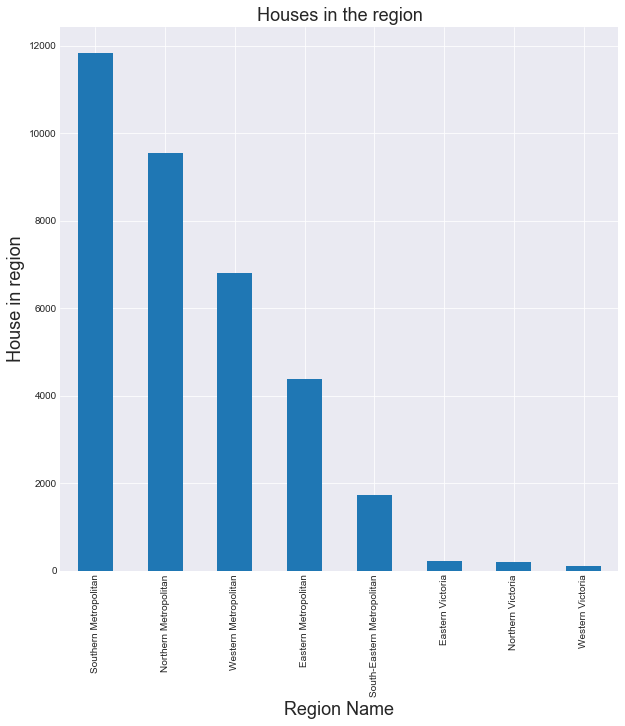

In [303]:
# Plot of house by RegionName

clean_house['Regionname'].value_counts().plot(kind='bar', figsize=(10,10))
plt.xlabel('Region Name', size = '18')
plt.ylabel('House in region', size = '18')
plt.title('Houses in the region', size = '18')

Categorical variable representing the total number of properties / houses, based on the region.

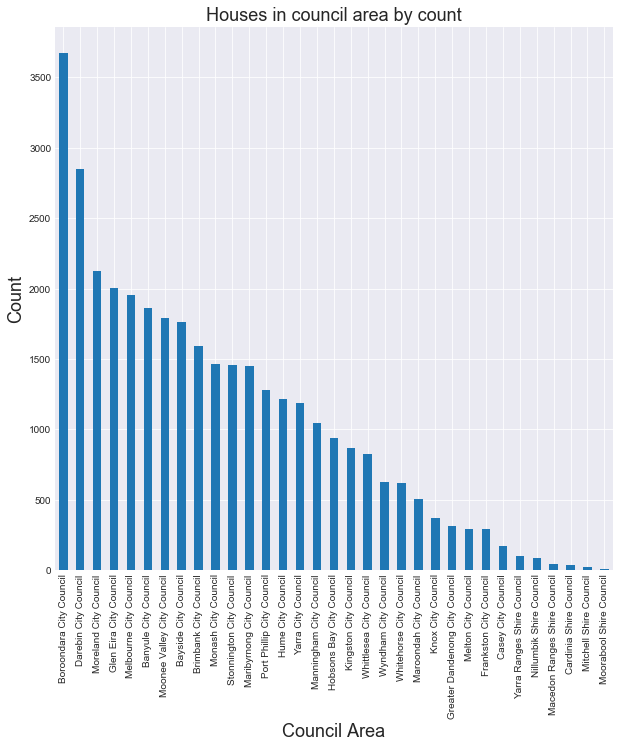

In [304]:
# Plot of number of house counts by councial area 

clean_house['CouncilArea'].value_counts().plot(kind='bar', figsize = (10,10))
plt.xlabel('Council Area', size = '18')
plt.ylabel('Count', size = '18')
plt.title('Houses in council area by count', size = '18')

Council area (categorical variable) determines under which council area the property falls in, and by what number.

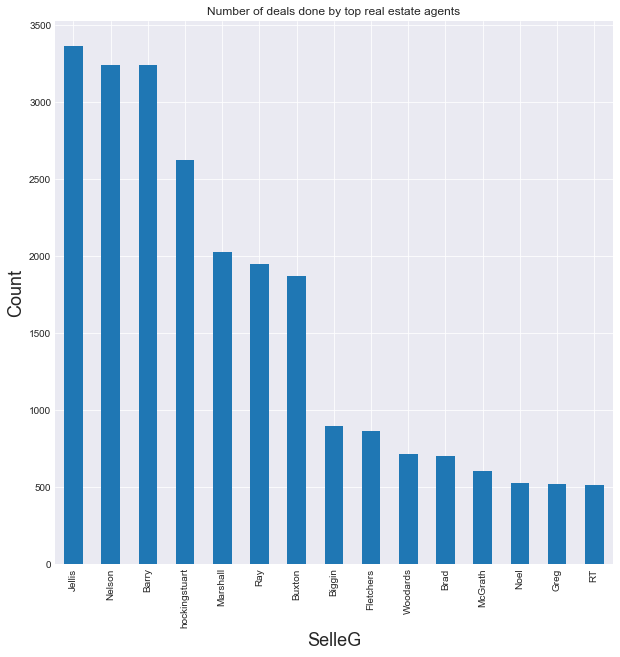

In [305]:
# We will plot the details of the number of deals done by the real 
# estate agents.
Agent = clean_house['SellerG'].value_counts()
Agent.head(n = 15).plot(kind = 'bar', figsize = (10,10), title = 'Number of deals done by top real estate agents')
plt.xlabel('SelleG', size = '18')
plt.ylabel('Count', size = '18') 

The above graph shows the top 15 real estate agents, with the total number of deals.

##### We will plot the graphs with respect to the dependant variable ('Price'), with different numeric and categorical attributes.

In [306]:
# We will make a new column price per square meter area.
# This column will help us determine the value or price of the house per square meter area.

clean_house['PricePerSqmtr'] = clean_house['Price'] // clean_house['BuildingArea']


In [307]:
clean_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34854 entries, 0 to 34853
Data columns (total 22 columns):
Suburb           34854 non-null object
Address          34854 non-null object
Rooms            34854 non-null int64
Type             34854 non-null object
Price            34854 non-null float64
Method           34854 non-null object
SellerG          34854 non-null object
Date             34854 non-null object
Distance         34854 non-null float64
Postcode         34854 non-null int64
Bedroom2         34854 non-null int64
Bathroom         34854 non-null int64
Car              34854 non-null int64
Landsize         34854 non-null float64
BuildingArea     34854 non-null float64
YearBuilt        34854 non-null int64
CouncilArea      34854 non-null object
Lattitude        34854 non-null float64
Longtitude       34854 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null int64
PricePerSqmtr    34778 non-null float64
dtypes: float64(7), int64(7), obj

In [308]:
pricepersqmtr_mean = clean_house.PricePerSqmtr.mean()
clean_house.PricePerSqmtr.fillna(pricepersqmtr_mean, axis = 0, inplace = True)

In [309]:
clean_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34854 entries, 0 to 34853
Data columns (total 22 columns):
Suburb           34854 non-null object
Address          34854 non-null object
Rooms            34854 non-null int64
Type             34854 non-null object
Price            34854 non-null float64
Method           34854 non-null object
SellerG          34854 non-null object
Date             34854 non-null object
Distance         34854 non-null float64
Postcode         34854 non-null int64
Bedroom2         34854 non-null int64
Bathroom         34854 non-null int64
Car              34854 non-null int64
Landsize         34854 non-null float64
BuildingArea     34854 non-null float64
YearBuilt        34854 non-null int64
CouncilArea      34854 non-null object
Lattitude        34854 non-null float64
Longtitude       34854 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null int64
PricePerSqmtr    34854 non-null float64
dtypes: float64(7), int64(7), obj

In [310]:
# Plotting the highest price of the suburbs per square meter.
# Price vs Suburb
# Here we have taken the mean of Price per square meter to determine the house rates, based on different areas in suburbs.

sub_price = clean_house[['Suburb', 'PricePerSqmtr']].groupby(['Suburb']).agg(['mean'])
sub_price.columns=['Mean PricePerSqmtr']
sub_price.head()


,Mean PricePerSqmtr
Suburb,
Abbotsford,"9,060.54"
Aberfeldie,"8,867.71"
Airport West,"5,353.88"
Albanvale,"5,185.29"
Albert Park,"11,543.21"


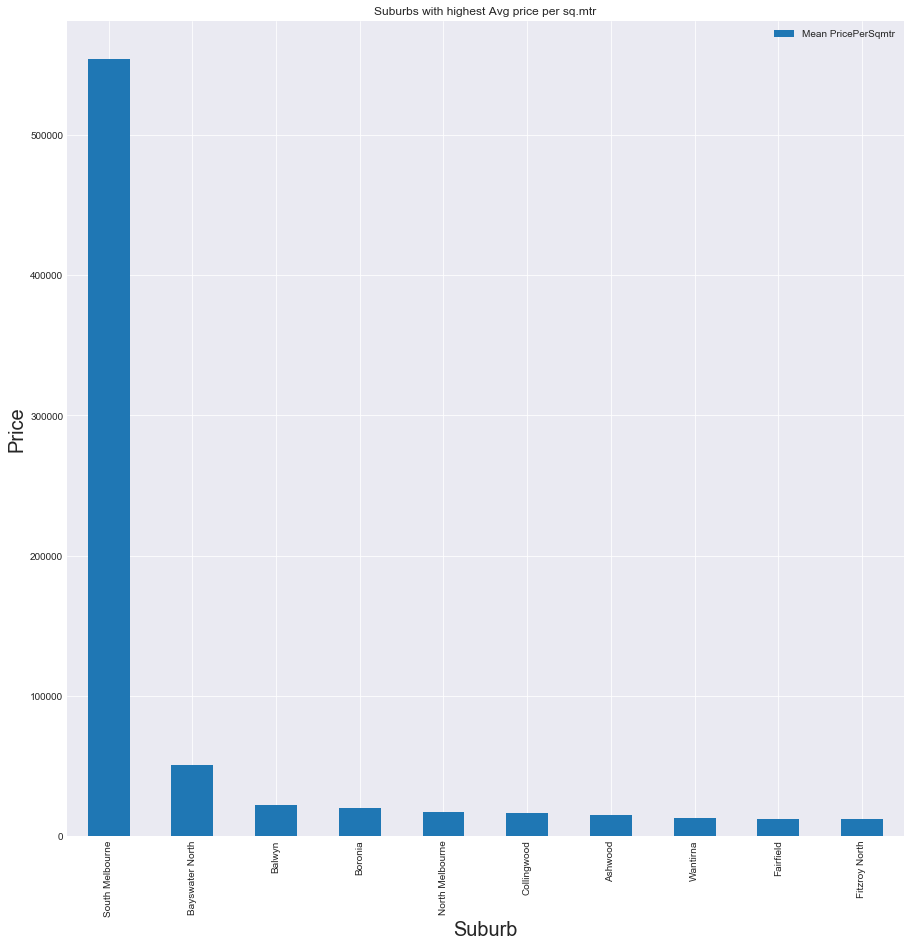

In [311]:

sub_price.nlargest(10,['Mean PricePerSqmtr']).plot(kind='bar', figsize = (15,15), title = 'Suburbs with highest Avg price per sq.mtr')
plt.ylabel('Price', size = '20')
plt.xlabel('Suburb', size = '20')

The visualization depicts that, South Melbourne has the highest price per square meter, in the suburbs region.

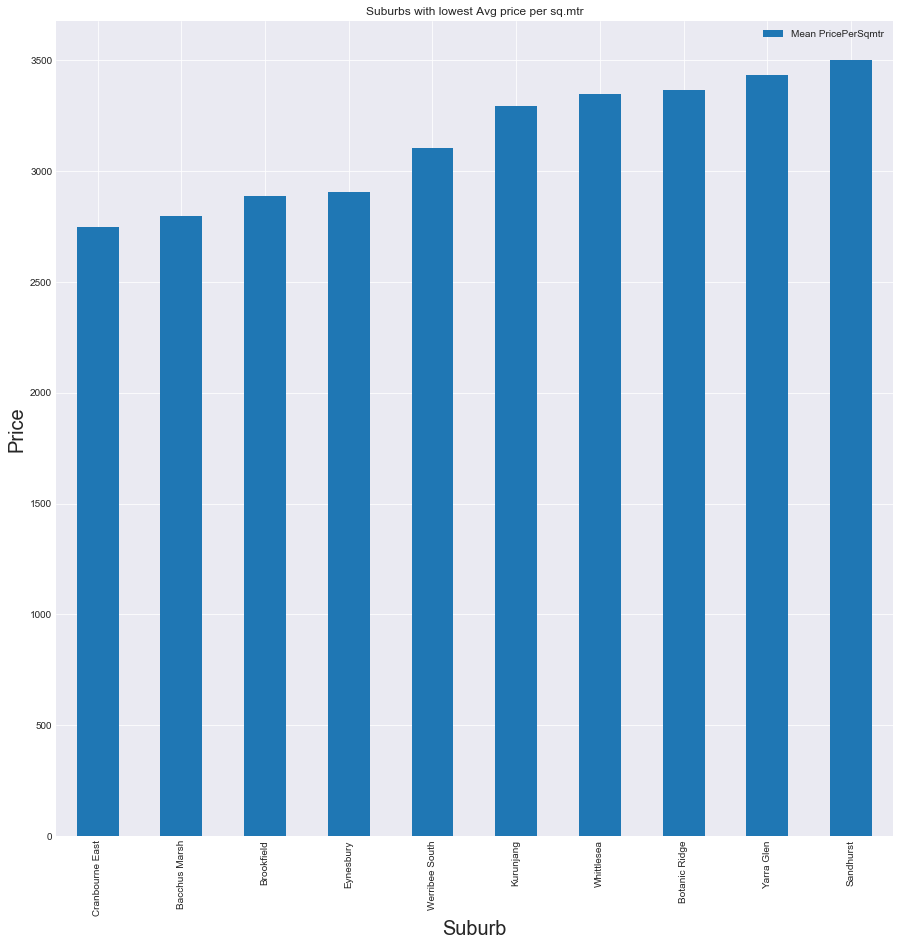

In [312]:
# Now we will look at the lowest average price rates per square meter

sub_price.nsmallest(10,['Mean PricePerSqmtr']).plot(kind='bar', figsize = (15,15), title = 'Suburbs with lowest Avg price per sq.mtr')
plt.ylabel('Price', size = '20')
plt.xlabel('Suburb', size = '20')

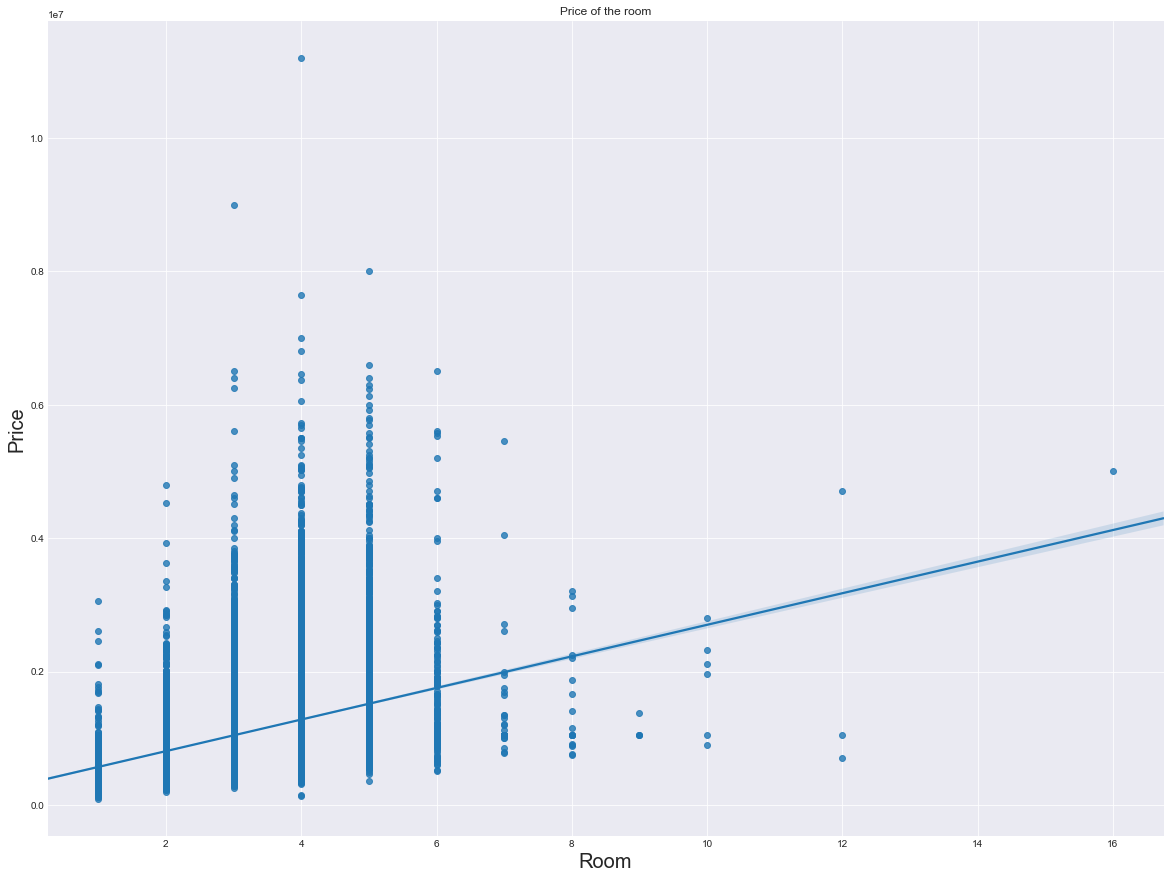

In [313]:
# Now we will present the visualization of rooms and price

plt.figure(figsize = (20,15))
sns.regplot(x = 'Rooms', y = 'Price', data = clean_house)
plt.xlabel('Room', size = 20)
plt.ylabel('Price', size = 20)
plt.title('Price of the room')

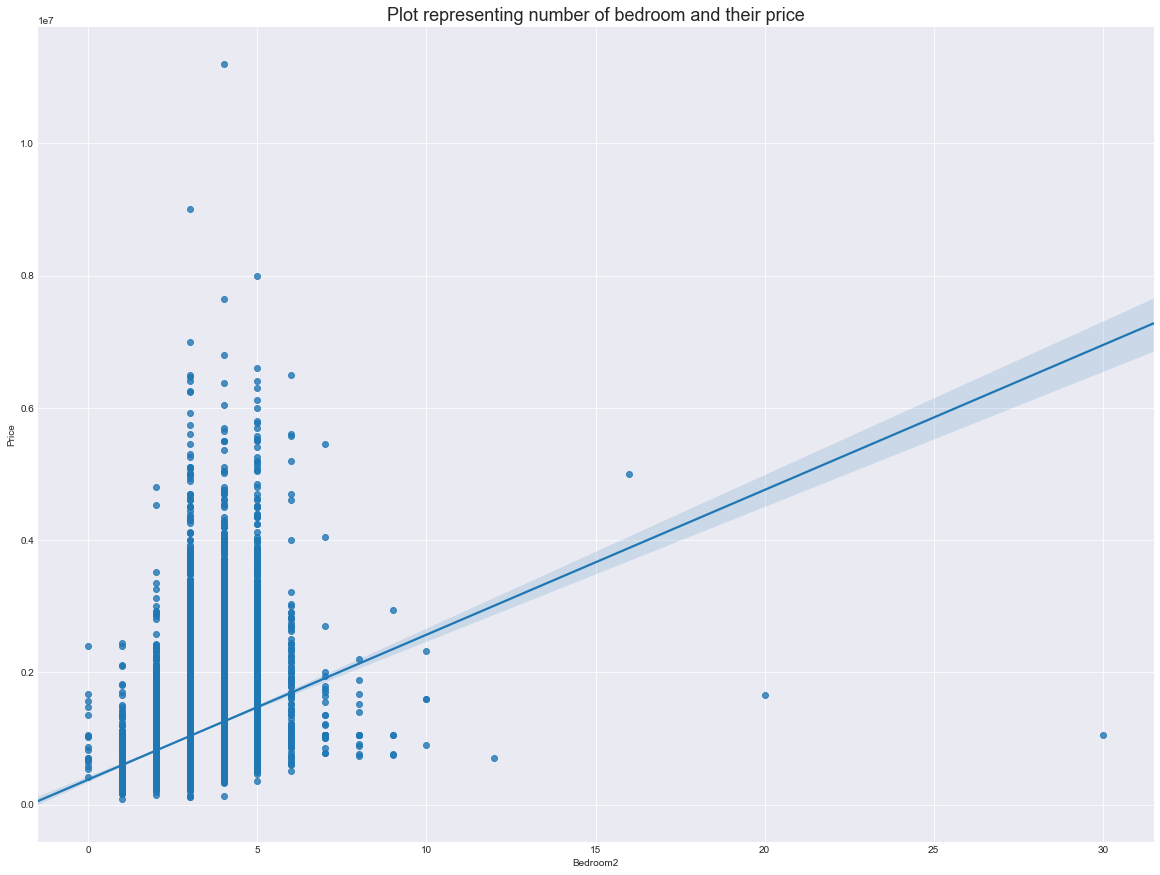

In [314]:
# The relation of number of bedrooms and their price

plt.figure(figsize = (20,15))
sns.regplot(x = 'Bedroom2', y = 'Price', data = clean_house)
plt.title('Plot representing number of bedroom and their price', size = '18')

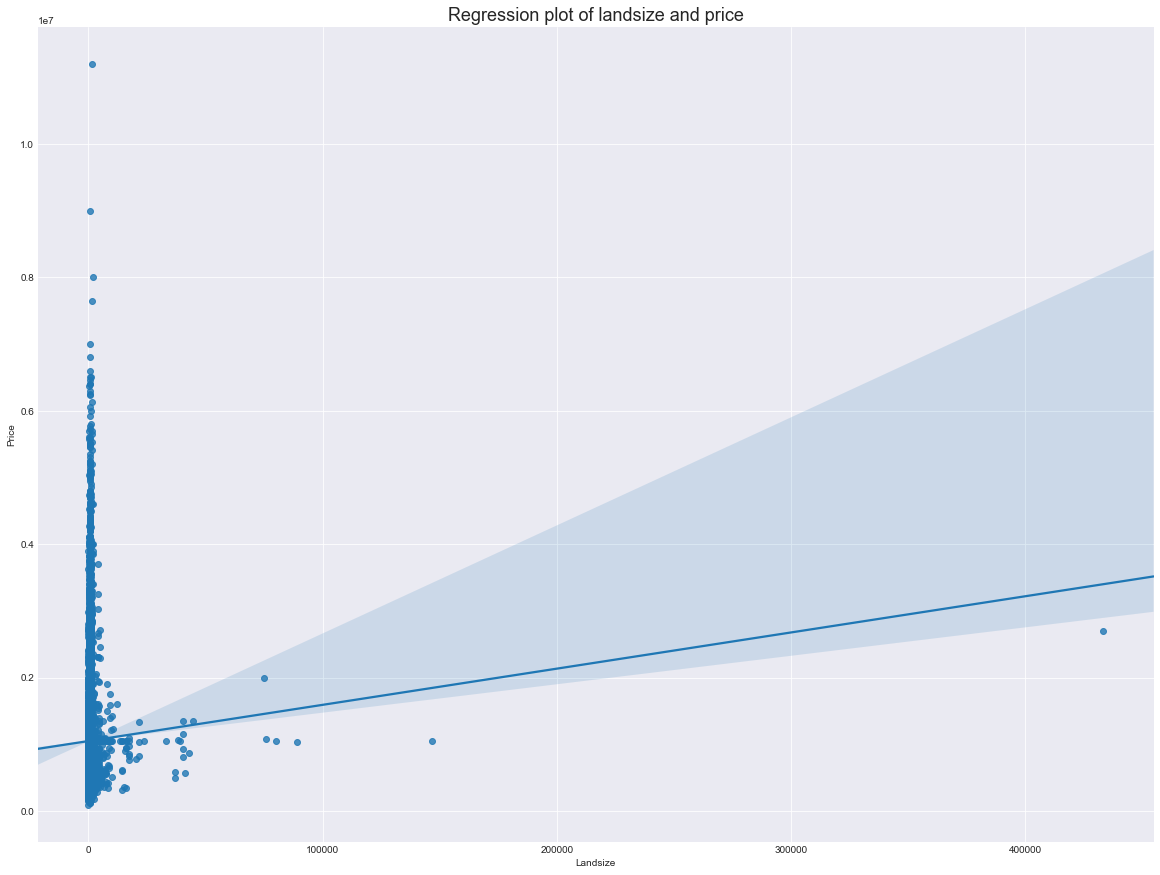

In [315]:
# Visualization of landsize and price, this will determine how the size of the
# land will affects price

plt.figure(figsize = (20,15))
sns.regplot(x = 'Landsize', y = 'Price', data = clean_house)
plt.title('Regression plot of landsize and price', size = '18')

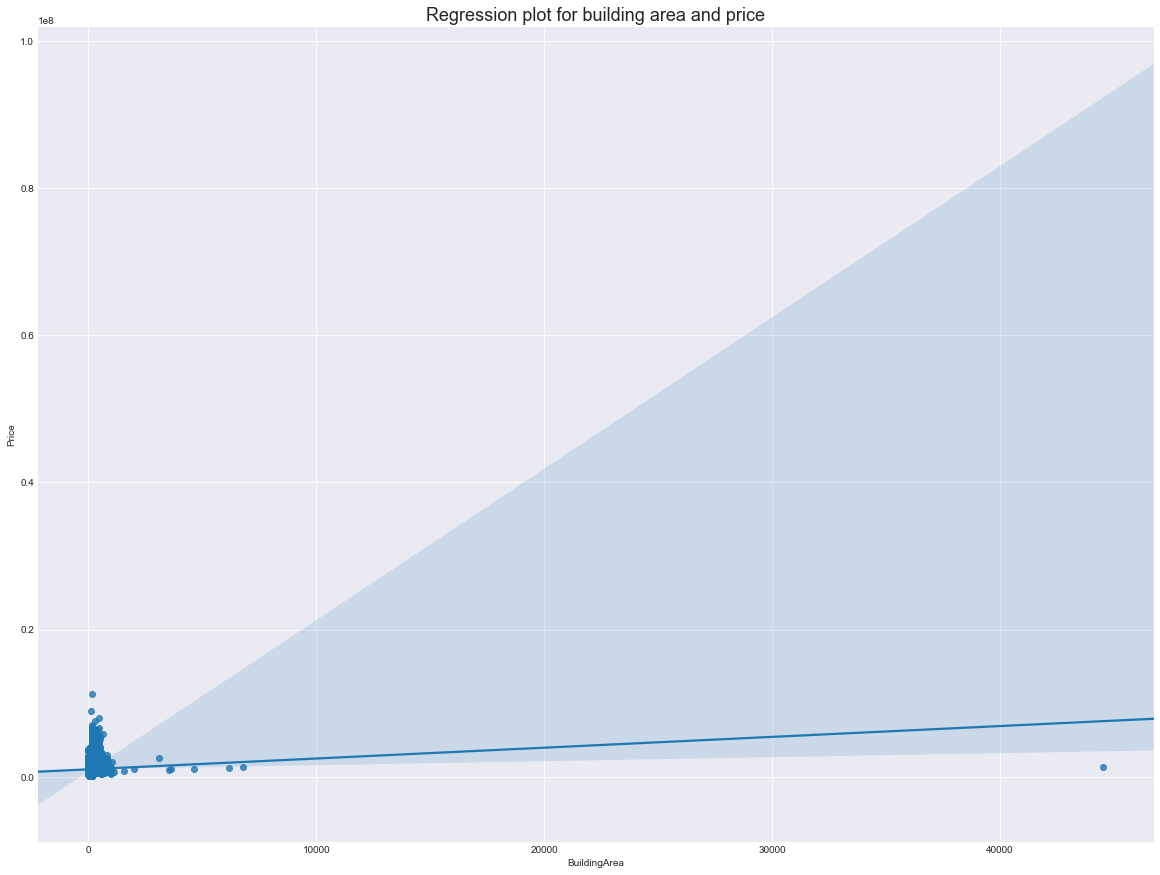

In [316]:
# Building Area and price relation.

plt.figure(figsize=(20,15))
sns.regplot(x = 'BuildingArea', y = 'Price', data = clean_house)
plt.title('Regression plot for building area and price', size = '18')

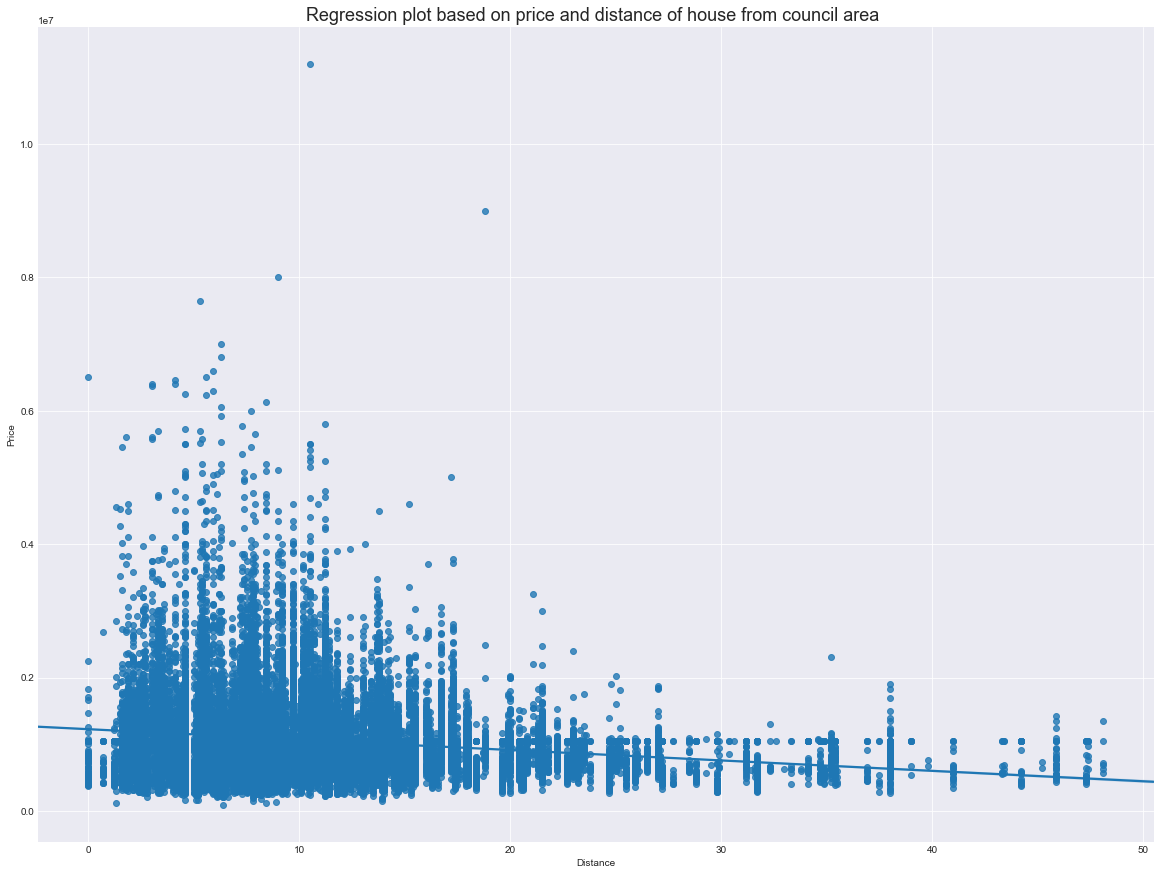

In [317]:
# The relation of the price with the distance of the central district building

plt.figure(figsize = (20,15))
sns.regplot(x = 'Distance', y = 'Price', data = clean_house)
plt.title('Regression plot based on price and distance of house from council area ', size = '18')

In [318]:
# Average square per meter price of the house based on the region.

region_price = clean_house[['Regionname', 'PricePerSqmtr']].groupby(['Regionname']).agg(['mean'])
region_price

,PricePerSqmtr
,mean
Regionname,
Eastern Metropolitan,"7,622.47"
Eastern Victoria,"5,173.21"
Northern Metropolitan,"7,723.82"
Northern Victoria,"4,279.94"
South-Eastern Metropolitan,"6,247.81"
Southern Metropolitan,"18,453.25"
Western Metropolitan,"6,433.16"
Western Victoria,"4,040.73"


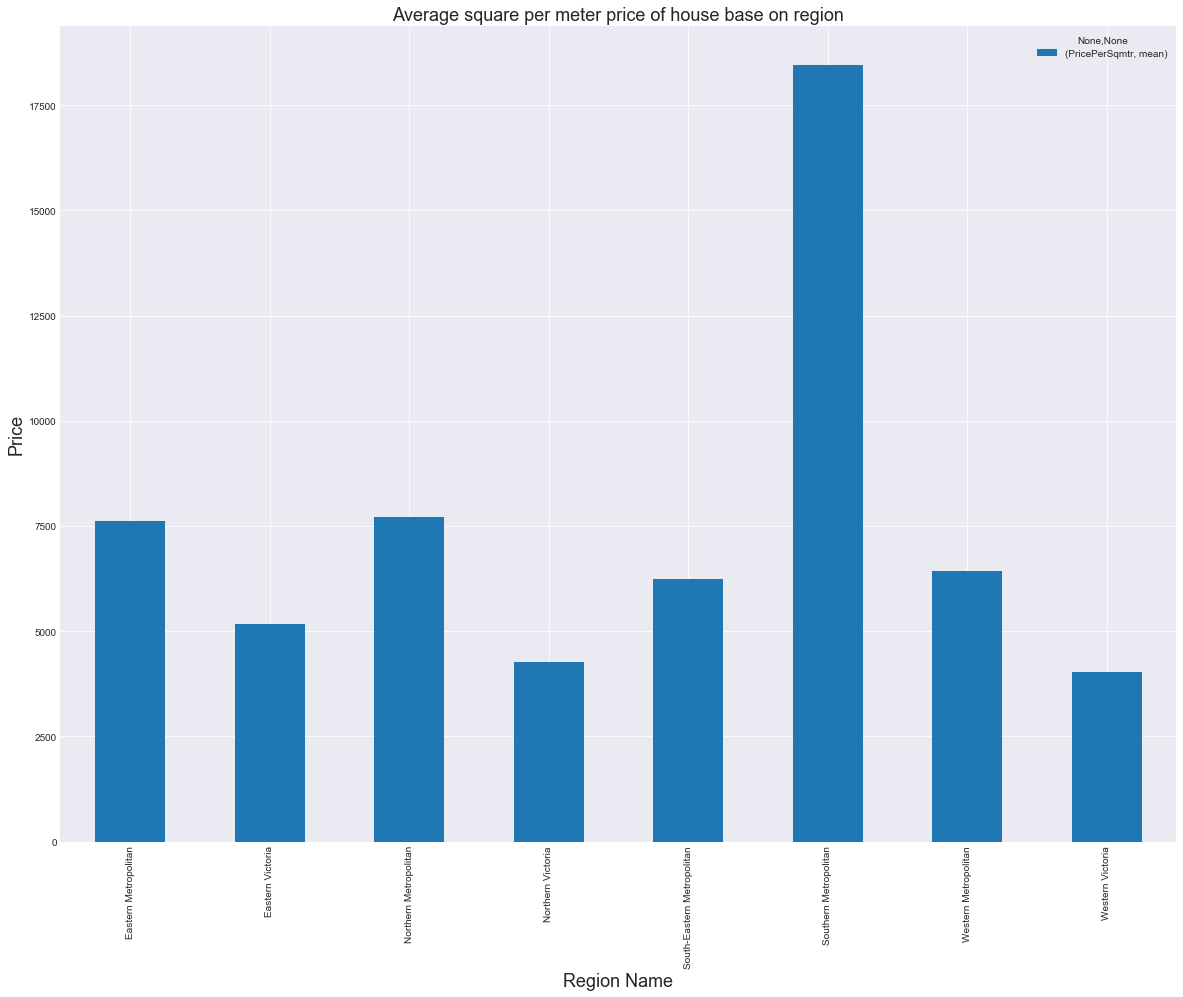

In [319]:
region_price.plot(kind = 'bar', figsize = (20,15))
plt.title('Average square per meter price of house base on region', size = '18')
plt.ylabel('Price', size = '18')
plt.xlabel('Region Name', size = '18')

In [320]:
# Price of the house based on the year they were built on 

year_price = clean_house[['YearBuilt', 'Price']].groupby(['YearBuilt']).agg(['mean'])
year_price

,Price
,mean
YearBuilt,
1196,"1,200,000.00"
1800,"1,050,173.34"
1820,"720,000.00"
1830,"855,000.00"
1850,"1,179,500.00"
1854,"2,180,086.67"
1855,"1,050,173.34"
1856,"2,260,000.00"


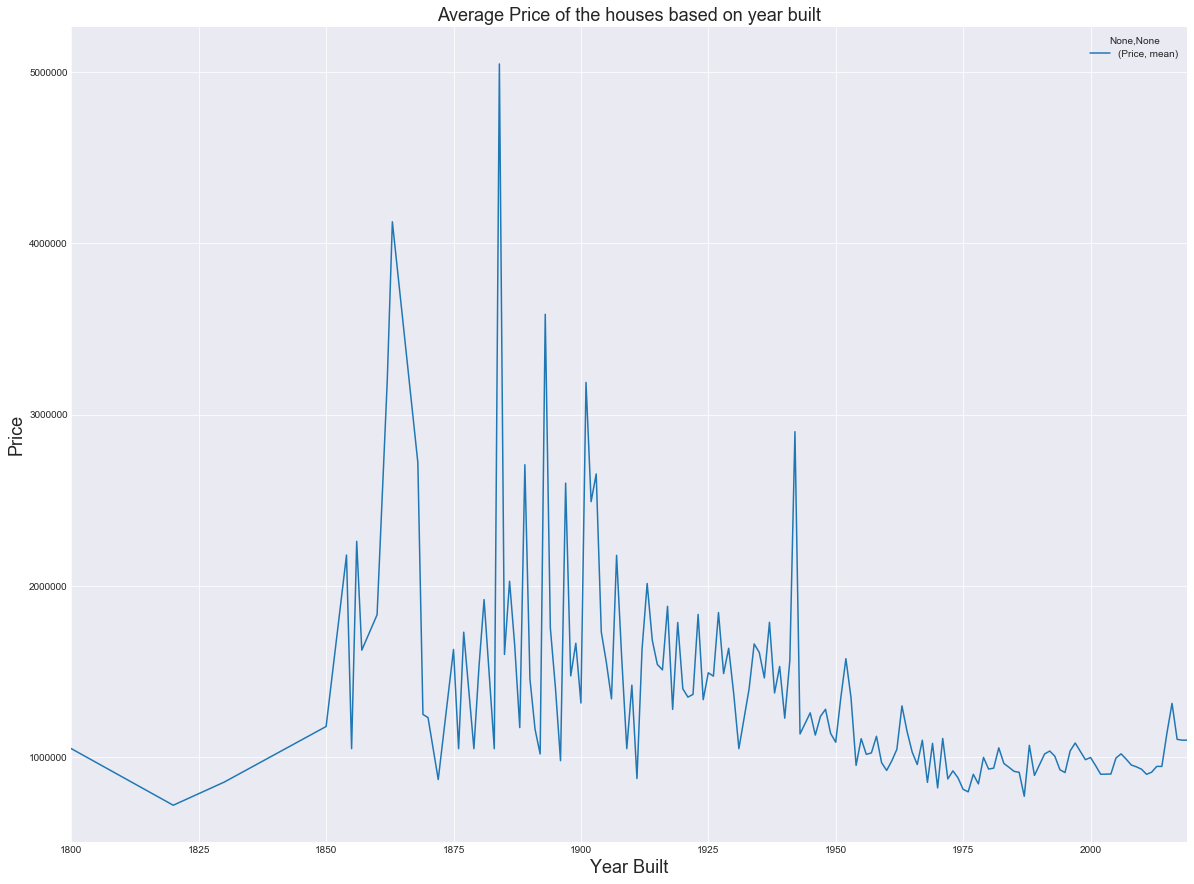

In [321]:
year_price.plot(figsize = (20,15))
plt.title('Average Price of the houses based on year built', size = '18')
plt.xlim([1800,2019])
plt.ylabel('Price', size = '18')
plt.xlabel('Year Built', size = '18')

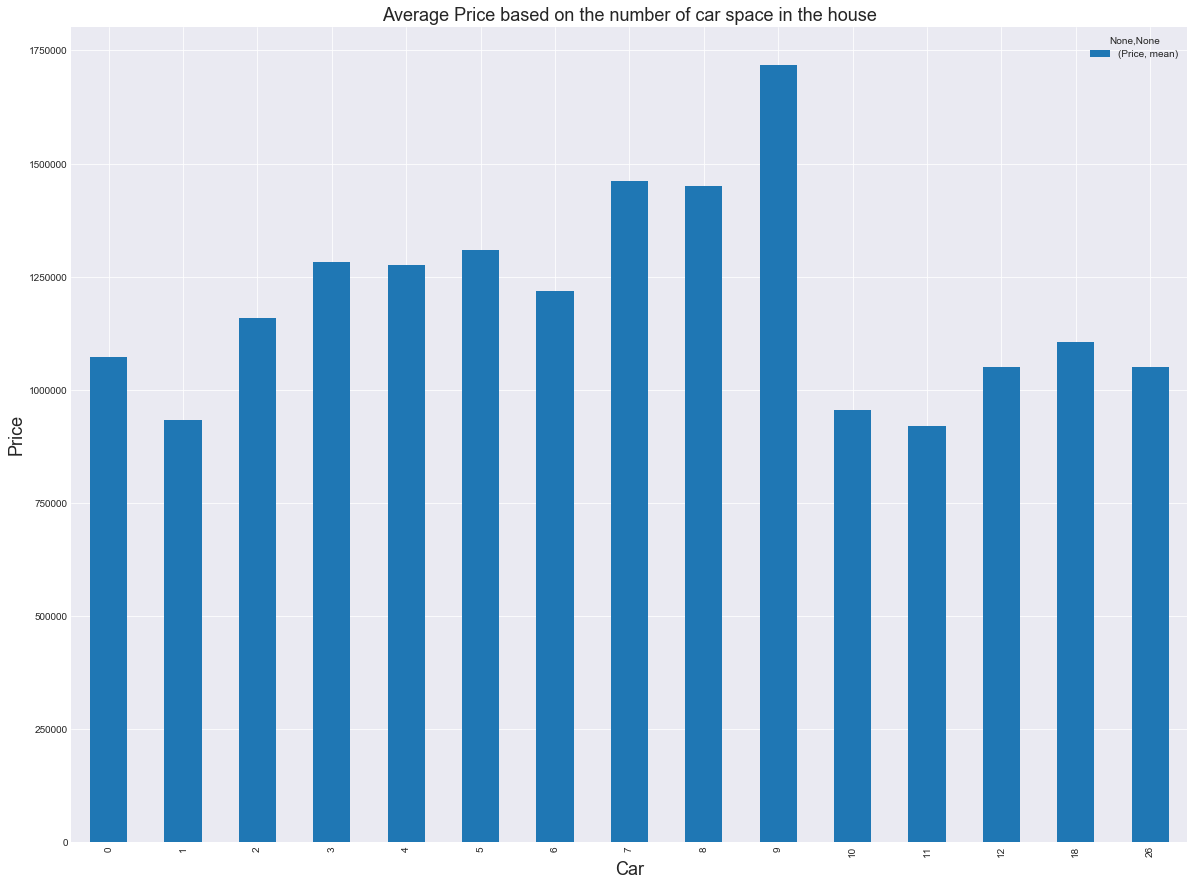

In [322]:
# Relation of price and car, the price of the house based on the number of 
# cars in the house

car_price = clean_house[['Car', 'Price']].groupby(['Car']).agg(['mean'])
car_price.plot(kind = 'bar', figsize = (20,15))
plt.title('Average Price based on the number of car space in the house', size = '18')
plt.ylabel('Price', size = '18')
plt.xlabel('Car', size = '18')

In [323]:
# Plot : Total sale of the property by real estate agent based on price

estate_price = clean_house[['SellerG', 'Price']].groupby(['SellerG']).agg(['sum'])

# Change the column name
estate_price.columns = ['Sale_by_sum']

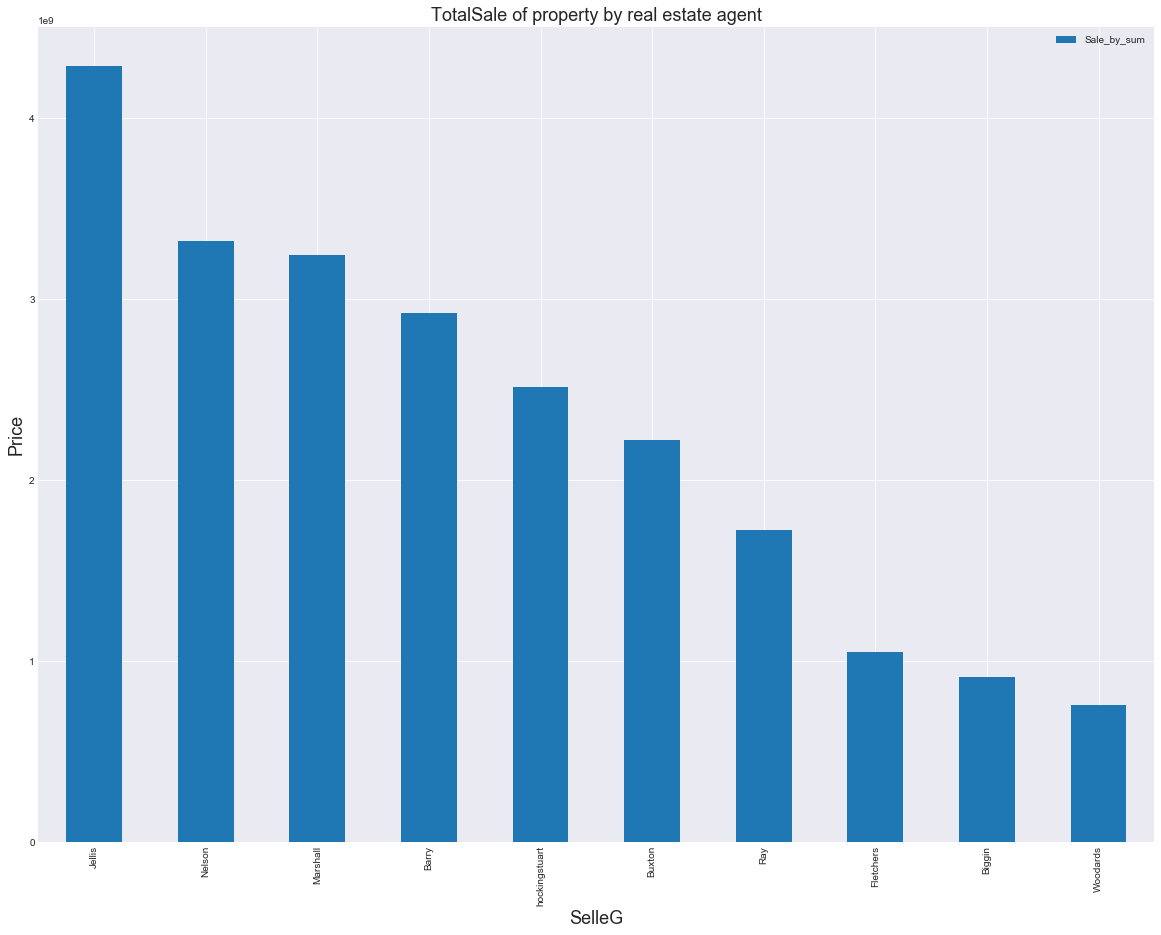

In [324]:
estate_price.nlargest(10,['Sale_by_sum']).plot(kind='bar', figsize = (20,15))
plt.title('TotalSale of property by real estate agent', size = '18')
plt.ylabel('Price', size = '18')
plt.xlabel('SelleG', size = '18')

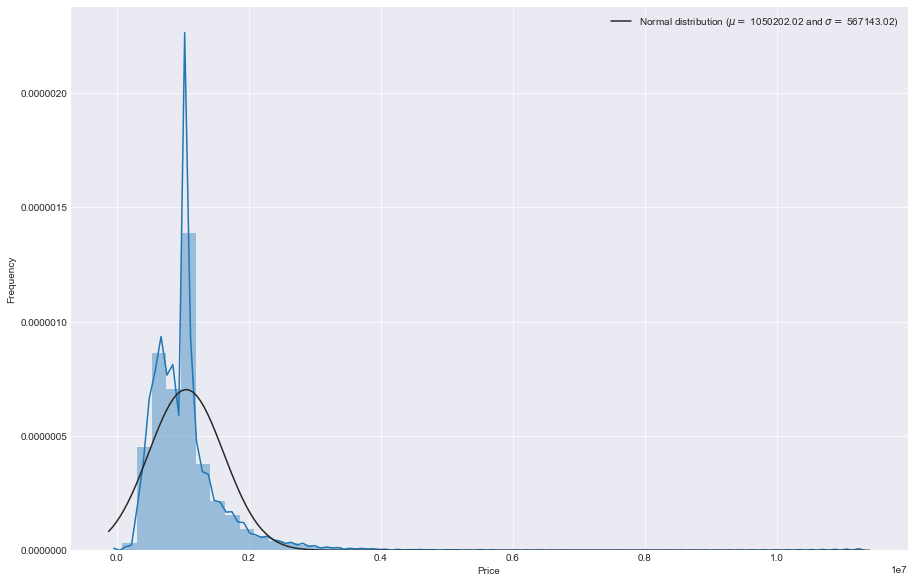

In [325]:
# Plotting Dependant variable or target variable 'Price'

plt.subplots(figsize = (15,10))
sns.distplot(clean_house['Price'], fit = stats.norm)

(mu, sigma) = stats.norm.fit(clean_house['Price'])

plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')


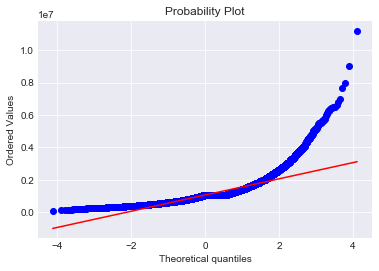

In [326]:
# Probability plot
fig = plt.figure()
stats.probplot(clean_house['Price'], plot=plt)
plt.show()

##### From the above normalization plot and probability plot we can see that, the value of the target attribute is skewed and the data is not normalized. Since the probability plot has curved line.

We will normalize the target attribute during regression analysis so that we can get appropriate results while generating the regression models

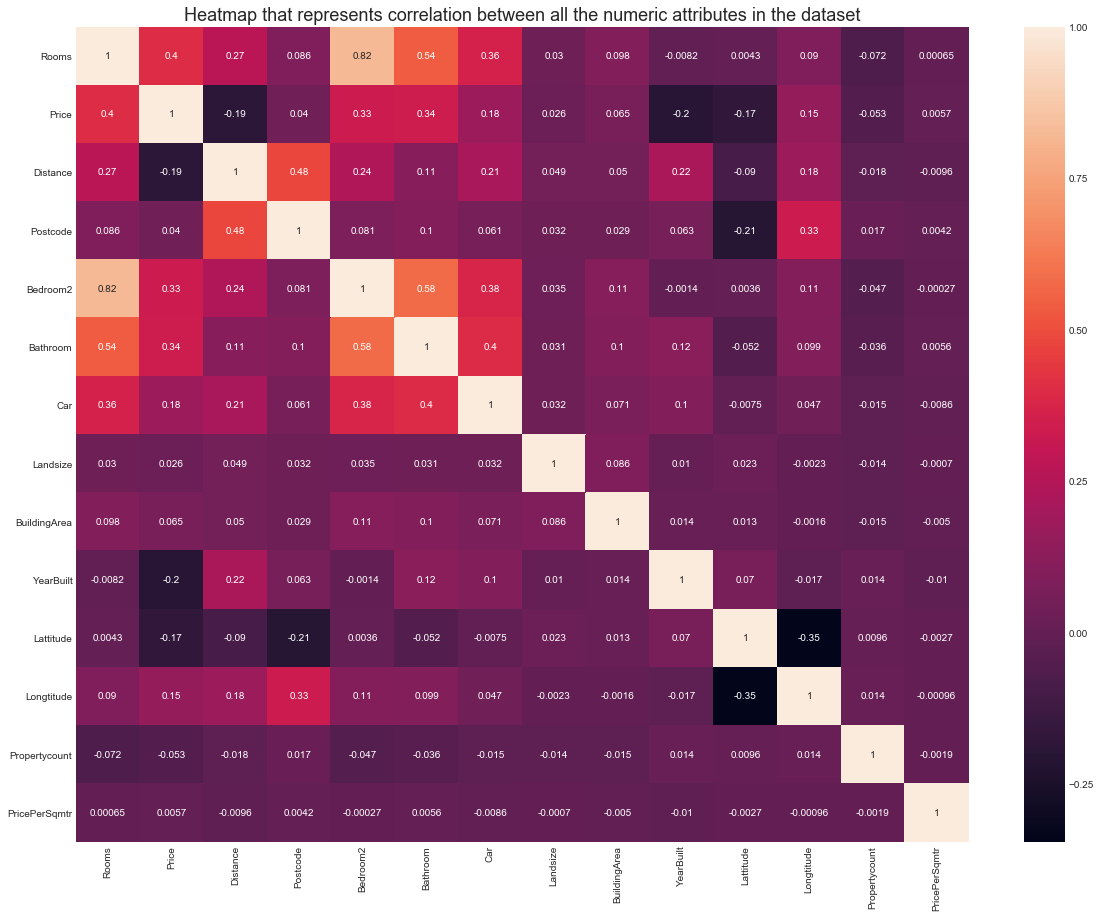

In [336]:
# Visualization of correlation plot with the help of heat map 

corr_plot = clean_house.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr_plot, annot = True)
plt.title('Heatmap that represents correlation between all the numeric attributes in the dataset', size = '18')

In [337]:
# Selecting features
corr_plot.sort_values(['Price'], ascending = False, inplace = True)
corr_plot.Price

Price            1.00
Rooms            0.40
Bathroom         0.34
Bedroom2         0.33
Car              0.18
Longtitude       0.15
BuildingArea     0.07
Postcode         0.04
Landsize         0.03
PricePerSqmtr    0.01
Propertycount   -0.05
Lattitude       -0.17
Distance        -0.19
YearBuilt       -0.20
Name: Price, dtype: float64

#### From the correlation plot and the correlation values displayed above, we can make the following conclusions

Based on the correlation rules: 
weak correlation = values close to 0.
strong negative corrrelation = values close to -1
Positive correlation = values close to 1

Here, in over case we have attributes, Rooms, Bathroom, Bedroom2 and Car which are having almost moderatelt good correlation. 
However, Car and Longitude are having values 0.18 and 0.15. Out of these Longtitude can be considered close to zero, if we look at it very precicely. 

The rest of the values like BuildingArea, Postcode, Landsize, PricePerSqmtr, Propertycount, Lattitude, Distance, YearBuilt including Longtitude can be skipped. Since, they are either having weak correlation or are negatively correlated with Target attribute Price.


## Pre-Processing task

#### Now, that we have done the statistical analysis and visual representation of the dataset, we will move towards the Pre-Processing task.
This involves: Generating dummy variables and normalizing the data. 

In [338]:
# Object / categorical variables in the dataset

clean_house.select_dtypes(include = ['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan


In [339]:
# Assigning a variable to these values.

cat_attribute = ('Type','Method','Regionname', 'CouncilArea', 'Date',
                'Address', 'SellerG', 'Suburb')

In [340]:
# Now we will perform Label Encoding

from sklearn.preprocessing import LabelEncoder

for var in cat_attribute:
    label = LabelEncoder()
    label.fit(list(clean_house[var].values))
    clean_house[var] = label.transform(list(clean_house[var].values))

For the above categorical variables, we can use 'Label encoding' approach to convert them into integer data types. The reason for using label encoding is, all the categorical variables/attributes cannot be converted to (0,1) dummy variable. 

For example 'Type' attribute consists of three types (h, s , t). Using label encoding it will become 0,1,2, same with other attributes which can yield appropriate results when Label encoding is applied.

There can be high cardinality with CouncilArea, Date, Address, SellerG, Suburb. So we can drop these categorical variable/attributes. The reason of discarding all these attributes is, they would have least influence in the variation of house  price. 

Selected categorical variables: Type, Method, Regionname.


In [341]:
# Let us check the values of categorical variables

clean_house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PricePerSqmtr
0,0,29455,2,0,"1,050,173.34",6,155,58,2.50,3067,...,1,126.00,160.26,1965,31,-37.80,145.00,2,4019,"6,553.00"
1,0,32509,2,0,"1,480,000.00",2,33,60,2.50,3067,...,1,202.00,160.26,1965,31,-37.80,145.00,2,4019,"9,235.00"
2,0,15386,2,0,"1,035,000.00",2,33,63,2.50,3067,...,0,156.00,79.00,1900,31,-37.81,144.99,2,4019,"13,101.00"
3,0,9767,3,2,"1,050,173.34",7,296,63,2.50,3067,...,1,0.00,160.26,1965,31,-37.81,145.01,2,4019,"6,553.00"
4,0,25125,3,0,"1,465,000.00",5,33,64,2.50,3067,...,0,134.00,150.00,1900,31,-37.81,144.99,2,4019,"9,766.00"


In the above output we can see that the categorical variables have changed to Labeled encoded format. Now we will select the specific parameters based on correlation plot and Label Encoding.

### Regression analysis

#### We will be evaluating the model efficiency by different criteria, which will be as follows:
1. Not normalizing both target attribute and Features of the dataset
2. Normalizing the Features and not normalizing the target attribute
3. 

#### Part 1. 

In [342]:
# Variable selection based on the correlation plot.
# Here we have removed Bedroom2 because Rooms and Bedroom2 have almost similar values which can generate duplication and
# overfitting

clean_house1 = clean_house[['Price', 'Rooms', 'Bathroom', 'Type', 'Method', 'Regionname', 'CouncilArea', 'SellerG', 'Suburb']]
clean_house1.head()

,Price,Rooms,Bathroom,Type,Method,Regionname,CouncilArea,SellerG,Suburb
0,"1,050,173.34",2,1,0,6,2,31,155,0
1,"1,480,000.00",2,1,0,2,2,31,33,0
2,"1,035,000.00",2,1,0,2,2,31,33,0
3,"1,050,173.34",3,2,2,7,2,31,296,0
4,"1,465,000.00",3,2,0,5,2,31,33,0


##### Removing Price (target attribute from the column)

In [343]:
target_price = clean_house1.pop('Price')
target_price.head()

0   1,050,173.34
1   1,480,000.00
2   1,035,000.00
3   1,050,173.34
4   1,465,000.00
Name: Price, dtype: float64

Creating testing and training data:

In [344]:
# Genereating testing and training data
percent = 0.8
size = int(percent * len(clean_house1))
ch1_train = clean_house1[:size]
ch1_test = clean_house1[size:]

In [345]:
tpercent = 0.8
tsize = int(tpercent * len(target_price))
target_train = target_price[:tsize]
target_test = target_price[tsize:]

#### Performing multiple regression with non - normalized dataset and target variable

In [346]:
# Performing multiple regression with non - normalized dataset and target variable

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [347]:
# we will be using dictionary to perform create the models

Reg_model = { 'Linear Regression': {'Model': LinearRegression()},
            'Ridge Regression': {'Model': Ridge()},
            'ElasticNet Regression': {'Model': ElasticNet()},
            'KNeighbors Regressor': {'Model': KNeighborsRegressor()},
            'Random Forest Regressor': {'Model': RandomForestRegressor()},
            'Gradient Boosting Regressor': {'Model': GradientBoostingRegressor()},
            'Ada Boost Regressor': {'Model': AdaBoostRegressor(n_estimators = 10)},
            'Decision Tree Regressor': {'Model': DecisionTreeRegressor(max_depth = 5, min_samples_split = 4, random_state = 1)},
            }
                    

In [348]:
for R_model in Reg_model:
    Reg_model[R_model]['Prediction data'] = None
    Reg_model[R_model]['Error value'] = { 'MAE': None,
                                            'MSE': None,
                                            'RMSE': None}
    Reg_model[R_model]['Scores'] = {'R-Squared': None}

In [349]:


for R_model in Reg_model:
    
    print('Executing: ', Reg_model[R_model]['Model'])
    
    Reg_model[R_model]['Model'].fit(ch1_train, target_train)
    
    Reg_model[R_model]['Predicted data'] = Reg_model[R_model]['Model'].predict(ch1_test)
    
    Reg_model[R_model]['Error value']['MAE'] = metrics.mean_absolute_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['MSE'] = metrics.mean_squared_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['RMSE'] = np.sqrt(Reg_model[R_model]['Error value']['MSE'])
    
    Reg_model[R_model]['Scores']['R-Squared'] = metrics.r2_score(target_test, Reg_model[R_model]['Predicted data'])
    
    print('Mean Absolute Error: ', Reg_model[R_model]['Error value']['MAE'])
    print('Mean Squared Error: ', Reg_model[R_model]['Error value']['MSE'])
    print('RMSE: ', Reg_model[R_model]['Error value']['RMSE'])
    print('R-Squared: ', Reg_model[R_model]['Scores']['R-Squared'])
    print('\n')

Executing:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error:  345876.234093
Mean Squared Error:  251489418488.0
RMSE:  501487.206705
R-Squared:  0.151209892716


Executing:  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Mean Absolute Error:  345874.874083
Mean Squared Error:  251488569752.0
RMSE:  501486.360485
R-Squared:  0.151212757245


Executing:  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Mean Absolute Error:  337459.03803
Mean Squared Error:  248955566034.0
RMSE:  498954.472907
R-Squared:  0.159761778952


Executing:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
Mea

#### Part 2.  Perform the analysis with normalized data without normalizing target attribute

In [350]:
# Normalizing the attributes 
from sklearn import preprocessing

In [351]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(ch1_train)
min_max_scaler.fit(ch1_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [352]:
ch1_train_norm = min_max_scaler.fit_transform(ch1_train)
ch1_test_norm = min_max_scaler.fit_transform(ch1_test)

In [353]:
ch1_train_norm.shape

(27883, 8)

In [354]:
ch1_test_norm.shape

(6971, 8)

In [355]:
target_train.shape

(27883,)

In [356]:
target_test.shape

(6971,)

In [357]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [358]:
# we will be using dictionary to perform create the models

Reg_model = { 'Linear Regression': {'Model': LinearRegression()},
            'Ridge Regression': {'Model': Ridge()},
            'ElasticNet Regression': {'Model': ElasticNet()},
            'KNeighbors Regressor': {'Model': KNeighborsRegressor()},
            'Random Forest Regressor': {'Model': RandomForestRegressor()},
            'Gradient Boosting Regressor': {'Model': GradientBoostingRegressor()},
            'Ada Boost Regressor': {'Model': AdaBoostRegressor(n_estimators = 10)},
            'Decision Tree Regressor': {'Model': DecisionTreeRegressor(max_depth = 5, min_samples_split = 4, random_state = 1)},
            }
                    

In [359]:
for R_model in Reg_model:
    Reg_model[R_model]['Prediction data'] = None
    Reg_model[R_model]['Error value'] = { 'MAE': None,
                                            'MSE': None,
                                            'RMSE': None}
    Reg_model[R_model]['Scores'] = {'R-Squared': None}

In [360]:


for R_model in Reg_model:
    
    print('Executing: ', Reg_model[R_model]['Model'])
    
    Reg_model[R_model]['Model'].fit(ch1_train_norm, target_train)
    
    Reg_model[R_model]['Predicted data'] = Reg_model[R_model]['Model'].predict(ch1_test_norm)
    
    Reg_model[R_model]['Error value']['MAE'] = metrics.mean_absolute_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['MSE'] = metrics.mean_squared_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['RMSE'] = np.sqrt(Reg_model[R_model]['Error value']['MSE'])
    
    Reg_model[R_model]['Scores']['R-Squared'] = metrics.r2_score(target_test, Reg_model[R_model]['Predicted data'])
    
    print('Mean Absolute Error: ', Reg_model[R_model]['Error value']['MAE'])
    print('Mean Squared Error: ', Reg_model[R_model]['Error value']['MSE'])
    print('RMSE: ', Reg_model[R_model]['Error value']['RMSE'])
    print('R-Squared: ', Reg_model[R_model]['Scores']['R-Squared'])
    print('\n')

Executing:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error:  535490.59323
Mean Squared Error:  470830108541.0
RMSE:  686170.611832
R-Squared:  -0.589076553373


Executing:  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Mean Absolute Error:  533057.945446
Mean Squared Error:  466679466056.0
RMSE:  683139.419194
R-Squared:  -0.575067915152


Executing:  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Mean Absolute Error:  341650.787728
Mean Squared Error:  281783515285.0
RMSE:  530832.850608
R-Squared:  0.0489657115317


Executing:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


####  Part 3.  Run the process with normalized target attribute and normalized Features 

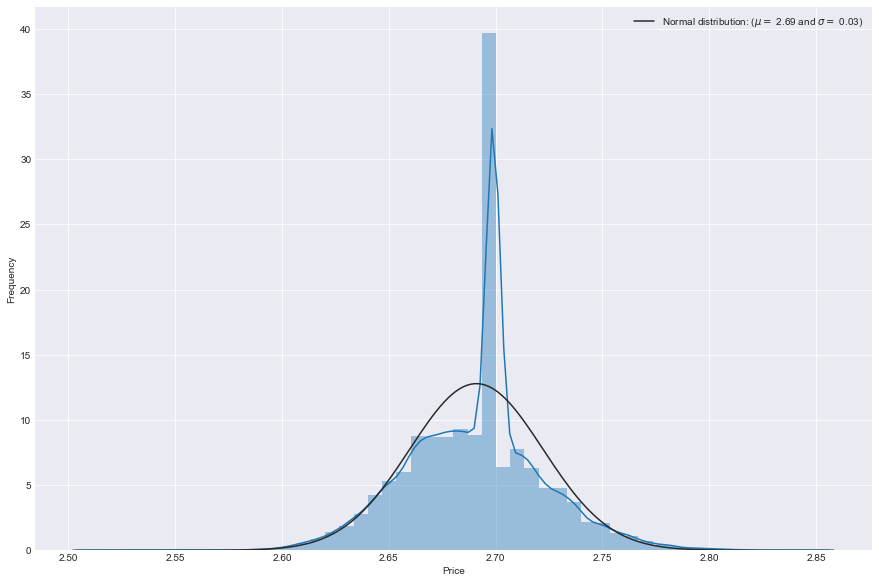

In [382]:
# Log transforming the target attribute since it was right skewed. 

clean_house['Price'] = np.log1p(clean_house['Price'])

# Now we will generate normalization plot.

plt.subplots(figsize=(15,10))
sns.distplot(clean_house['Price'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(clean_house['Price'])

plt.legend(['Normal distribution: ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')


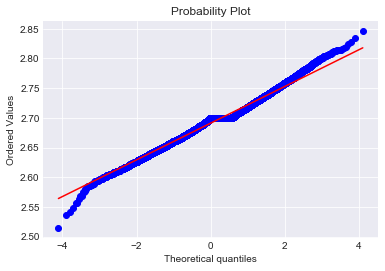

In [383]:
fig = plt.figure()
stats.probplot(clean_house['Price'], plot=plt)
plt.show()

#### Regression Using log transformed Target attribute and normalized attributes 

In [368]:
clean_house1 = clean_house[['Price', 'Rooms', 'Bathroom', 'Type', 'Method', 'Regionname', 'CouncilArea', 'SellerG', 'Suburb']]
clean_house1.head()

,Price,Rooms,Bathroom,Type,Method,Regionname,CouncilArea,SellerG,Suburb
0,13.86,2,1,0,6,2,31,155,0
1,14.21,2,1,0,2,2,31,33,0
2,13.85,2,1,0,2,2,31,33,0
3,13.86,3,2,2,7,2,31,296,0
4,14.20,3,2,0,5,2,31,33,0


In [369]:
# Genereating testing and training data
percent = 0.8
size = int(percent * len(clean_house1))
ch1_train = clean_house1[:size]
ch1_test = clean_house1[size:]

In [370]:
tpercent = 0.8
tsize = int(tpercent * len(target_price))
target_train = target_price[:tsize]
target_test = target_price[tsize:]

In [371]:
target_price = clean_house1.pop('Price')
target_price.head()

0   13.86
1   14.21
2   13.85
3   13.86
4   14.20
Name: Price, dtype: float64

In [372]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(ch1_train)
min_max_scaler.fit(ch1_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [373]:
ch1_train_norm = min_max_scaler.fit_transform(ch1_train)
ch1_test_norm = min_max_scaler.fit_transform(ch1_test)

In [374]:
for R_model in Reg_model:
    
    print('Executing: ', Reg_model[R_model]['Model'])
    
    Reg_model[R_model]['Model'].fit(ch1_train_norm, target_train)
    
    Reg_model[R_model]['Predicted data'] = Reg_model[R_model]['Model'].predict(ch1_test_norm)
    
    Reg_model[R_model]['Error value']['MAE'] = metrics.mean_absolute_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['MSE'] = metrics.mean_squared_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['RMSE'] = np.sqrt(Reg_model[R_model]['Error value']['MSE'])
    
    Reg_model[R_model]['Scores']['R-Squared'] = metrics.r2_score(target_test, Reg_model[R_model]['Predicted data'])
    
    print('Mean Absolute Error: ', Reg_model[R_model]['Error value']['MAE'])
    print('Mean Squared Error: ', Reg_model[R_model]['Error value']['MSE'])
    print('RMSE: ', Reg_model[R_model]['Error value']['RMSE'])
    print('R-Squared: ', Reg_model[R_model]['Scores']['R-Squared'])
    print('\n')

Executing:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error:  0.111442002135
Mean Squared Error:  0.0174018105856
RMSE:  0.131915922411
R-Squared:  0.910566638762


Executing:  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Mean Absolute Error:  0.112232104917
Mean Squared Error:  0.017429304813
RMSE:  0.13202009246
R-Squared:  0.910425337306


Executing:  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Mean Absolute Error:  0.335995763495
Mean Squared Error:  0.194917107943
RMSE:  0.441494176567
R-Squared:  -0.00174013734278


Executing:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uni

#### Part 4. Operation with reduced number of parameters but normalized data and normalized labels
##### Generating a model with limited number of parameters to test if we get better accuracy, here also we will keep the target attribute normalized by log transformation and the data attributes normalized.

In [375]:
clean_house1 = clean_house[['Price', 'Rooms', 'Bathroom', 'Type', 'Method','CouncilArea']]
clean_house1.head()

,Price,Rooms,Bathroom,Type,Method,CouncilArea
0,13.86,2,1,0,6,31
1,14.21,2,1,0,2,31
2,13.85,2,1,0,2,31
3,13.86,3,2,2,7,31
4,14.20,3,2,0,5,31


In [376]:
# Genereating testing and training data
percent = 0.8
size = int(percent * len(clean_house1))
ch1_train = clean_house1[:size]
ch1_test = clean_house1[size:]

In [377]:
tpercent = 0.8
tsize = int(tpercent * len(target_price))
target_train = target_price[:tsize]
target_test = target_price[tsize:]

In [378]:
target_price = clean_house1.pop('Price')
target_price.head()

0   13.86
1   14.21
2   13.85
3   13.86
4   14.20
Name: Price, dtype: float64

In [379]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(ch1_train)
min_max_scaler.fit(ch1_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [380]:
ch1_train_norm = min_max_scaler.fit_transform(ch1_train)
ch1_test_norm = min_max_scaler.fit_transform(ch1_test)

In [381]:
for R_model in Reg_model:
    
    print('Executing: ', Reg_model[R_model]['Model'])
    
    Reg_model[R_model]['Model'].fit(ch1_train_norm, target_train)
    
    Reg_model[R_model]['Predicted data'] = Reg_model[R_model]['Model'].predict(ch1_test_norm)
    
    Reg_model[R_model]['Error value']['MAE'] = metrics.mean_absolute_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['MSE'] = metrics.mean_squared_error(target_test, Reg_model[R_model]['Predicted data'])
    
    Reg_model[R_model]['Error value']['RMSE'] = np.sqrt(Reg_model[R_model]['Error value']['MSE'])
    
    Reg_model[R_model]['Scores']['R-Squared'] = metrics.r2_score(target_test, Reg_model[R_model]['Predicted data'])
    
    print('Mean Absolute Error: ', Reg_model[R_model]['Error value']['MAE'])
    print('Mean Squared Error: ', Reg_model[R_model]['Error value']['MSE'])
    print('RMSE: ', Reg_model[R_model]['Error value']['RMSE'])
    print('R-Squared: ', Reg_model[R_model]['Scores']['R-Squared'])
    print('\n')

Executing:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Mean Absolute Error:  0.111442002135
Mean Squared Error:  0.0174018105856
RMSE:  0.131915922411
R-Squared:  0.910566638762


Executing:  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Mean Absolute Error:  0.112282672745
Mean Squared Error:  0.0174422790267
RMSE:  0.132069220588
R-Squared:  0.910358658754


Executing:  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Mean Absolute Error:  0.335995763495
Mean Squared Error:  0.194917107943
RMSE:  0.441494176567
R-Squared:  -0.00174013734278


Executing:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='u

## Clustering 

Clustering using kmeans sklearn module
Clustering will be performed on 'Type' attribute of the dataset

In [91]:
# Inporting the dataset

cluster_house = pd.read_csv('D:/DEPAUL/Depaul 5th quarter (AUTUMN)/DSC 478/PROJECT/int64index_CLEAN.csv')
cluster_house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067,...,1,1,126.0,160.2564,1965,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067,...,1,1,202.0,160.2564,1965,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067,...,1,0,156.0,79.0000,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067,...,2,1,0.0,160.2564,1965,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134.0,150.0000,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019


Here we will convert all the numeric attributes into normalized data. From the categorical/object type, we will extract Type attribute to perform clustering.

In [384]:
# Selecting the integer datatypes
cluster_house.select_dtypes(include = ['int64']).head()

,Rooms,Postcode,Bedroom2,Bathroom,Car,YearBuilt,Propertycount
0,2,3067,2,1,1,1965,4019
1,2,3067,2,1,1,1965,4019
2,2,3067,2,1,0,1900,4019
3,3,3067,3,2,1,1965,4019
4,3,3067,3,2,0,1900,4019


In [385]:
# Selecting object / catrgorical data types
cluster_house.select_dtypes(include = ['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan


In [94]:
# We will store the Caterogical attribute Type in a seperate file to later compute it easily while performing clustering
Type = cluster_house['Type']

In [95]:
Type_var = Type.to_csv('D:/DEPAUL/Depaul 5th quarter (AUTUMN)/DSC 478/PROJECT/Type_clust.csv', index = False)

In [386]:
# Selecting integer numerical attributes except Bedroom2, because Room and Bedroom2 have similarity in data. 

Final_clust = cluster_house[['Rooms', 'Postcode', 'Bathroom', 'Car', 'YearBuilt', 'Propertycount']]
Final_clust.head()

,Rooms,Postcode,Bathroom,Car,YearBuilt,Propertycount
0,2,3067,1,1,1965,4019
1,2,3067,1,1,1965,4019
2,2,3067,1,0,1900,4019
3,3,3067,2,1,1965,4019
4,3,3067,2,0,1900,4019


##### Normalize the data so that clustering can become easier

In [97]:
from sklearn import preprocessing

In [98]:
min_max_scaler = preprocessing.MinMaxScaler().fit(Final_clust)

norm_Final_clust = min_max_scaler.transform(Final_clust)
norm_Final_clust = pd.DataFrame(norm_Final_clust, columns = Final_clust.columns)

In [99]:
norm_Final_clust.head()

,Rooms,Postcode,Bathroom,Car,YearBuilt,Propertycount
0,0.066667,0.068507,0.083333,0.038462,0.845055,0.182501
1,0.066667,0.068507,0.083333,0.038462,0.845055,0.182501
2,0.066667,0.068507,0.083333,0.000000,0.773626,0.182501
3,0.133333,0.068507,0.166667,0.038462,0.845055,0.182501
4,0.133333,0.068507,0.166667,0.000000,0.773626,0.182501


In [100]:
# Now we will perform clustering on the norm_Final_clust
from sklearn.cluster import KMeans

In [131]:
cluster_class = pd.read_csv('D:/DEPAUL/Depaul 5th quarter (AUTUMN)/DSC 478/PROJECT/Type_clust.csv', header = None)
cluster_class.head(10)

,0
0,h
1,h
2,h
3,u
4,h
5,h
6,h
7,h
8,h
9,h


In [389]:
# We will perform 5 clusters

kmeans_house = KMeans(n_clusters = 5, max_iter=500, verbose = 1)

In [390]:
kmeans_house.fit(norm_Final_clust)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 738.625246207
start iteration
done sorting
end inner loop
Iteration 1, inertia 678.47871873
start iteration
done sorting
end inner loop
Iteration 2, inertia 666.170504439
start iteration
done sorting
end inner loop
Iteration 3, inertia 662.315836171
start iteration
done sorting
end inner loop
Iteration 4, inertia 659.977440729
start iteration
done sorting
end inner loop
Iteration 5, inertia 658.550111864
start iteration
done sorting
end inner loop
Iteration 6, inertia 657.243994883
start iteration
done sorting
end inner loop
Iteration 7, inertia 656.765502176
start iteration
done sorting
end inner loop
Iteration 8, inertia 656.690116024
start iteration
done sorting
end inner loop
Iteration 9, inertia 656.653008951
start iteration
done sorting
end inner loop
Iteration 10, inertia 656.567199918
start iteration
done sorting
end inner loop
Iteration 11, inertia 656.519885337
start iteration
done sortin

start iteration
done sorting
end inner loop
Iteration 19, inertia 657.748440664
start iteration
done sorting
end inner loop
Iteration 20, inertia 657.675963624
start iteration
done sorting
end inner loop
Iteration 21, inertia 657.668972369
center shift 8.956420e-04 within tolerance 1.067751e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 717.44036291
start iteration
done sorting
end inner loop
Iteration 1, inertia 678.730525859
start iteration
done sorting
end inner loop
Iteration 2, inertia 668.726902001
start iteration
done sorting
end inner loop
Iteration 3, inertia 666.458842382
start iteration
done sorting
end inner loop
Iteration 4, inertia 666.198713064
start iteration
done sorting
end inner loop
Iteration 5, inertia 666.157527423
start iteration
done sorting
end inner loop
Iteration 6, inertia 666.130148861
start iteration
done sorting
end inner loop
Iteration 7, inertia 666.118024707
center shift 9.522264e-04 within tolerance 1.0677

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [391]:
# Predicting clusters
cluster = kmeans_house.predict(norm_Final_clust)

In [392]:
pd.DataFrame(cluster, columns=["Clusters"])

,Clusters
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [393]:
# Now we will generate the centroids that allow aggregation
# and characterization of each cluster

pd.options.display.float_format='{:,.2f}'.format

centroid = pd.DataFrame(kmeans_house.cluster_centers_, columns = norm_Final_clust.columns)
centroid

,Rooms,Postcode,Bathroom,Car,YearBuilt,Propertycount
0,0.12,0.09,0.11,0.06,0.85,0.77
1,0.14,0.10,0.12,0.06,0.85,0.14
2,0.13,0.13,0.12,0.06,0.84,0.48
3,0.14,0.10,0.13,0.06,0.84,0.29
4,0.17,0.81,0.15,0.07,0.87,0.34


In [394]:
def size_cluster(cluster):
    size = {}
    cluster_label = np.unique(cluster)
    n_cluster = cluster_label.shape[0]
    
    for clust in cluster_label:
        size[clust] = len(norm_Final_clust[cluster == clust])
    return size

In [395]:
size = size_cluster(cluster)

for clust in size.keys():
    print("Size pf cluster", clust, '=', size[clust])

Size pf cluster 0 = 3772
Size pf cluster 1 = 9483
Size pf cluster 2 = 8930
Size pf cluster 3 = 12111
Size pf cluster 4 = 558


#### Silhouette analysis

In [396]:
from sklearn import metrics

In [397]:
silhouettes_method = metrics.silhouette_samples(norm_Final_clust, cluster)
print(silhouettes_method[:20])

[ 0.17416431  0.17416431  0.1308184   0.17385824  0.12917666  0.17385824
  0.1563753   0.14517219  0.13881987  0.12064192  0.15723707  0.13551418
  0.13492106  0.09501031  0.13137783  0.20764453  0.17416431  0.11436238
  0.13881987  0.17416431]


In [398]:
print(silhouettes_method.mean())

0.246093574767


In [399]:
# Now we will plot the clusters on Silhouettes plot
def Silhouette(norm_Final_clust, cluster, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    
    cluster_labels = np.unique(cluster)
    n_clusters = cluster_labels.shape[0]
    silhouette_values = metrics.silhouette_samples(norm_Final_clust, cluster, metric = 'euclidean')
    cluster_ax_lower, cluster_ax_upper = 0,0
    cluster_ticks = []
    
    for a, b in enumerate(cluster_labels):
        
        cluster_silhouette_values = silhouette_values[cluster == b]
        cluster_silhouette_values.sort()
        cluster_ax_upper += len(cluster_silhouette_values)
        color = cm.jet(float(a)/n_clusters)
        pl.barh(range(cluster_ax_lower, cluster_ax_upper), cluster_silhouette_values, height = 1.0,
                edgecolor = 'none', color = color)
        
        
        cluster_ticks.append((cluster_ax_lower + cluster_ax_upper) / 2)
        cluster_ax_lower += len(cluster_silhouette_values)
    
    silhouette_average = np.mean(silhouette_values)
    pl.axvline(silhouette_average, color = 'red', linestyle = '--')
    
    pl.yticks(cluster_ticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')
    
    pl.tight_layout()
    pl.show()
    
    return

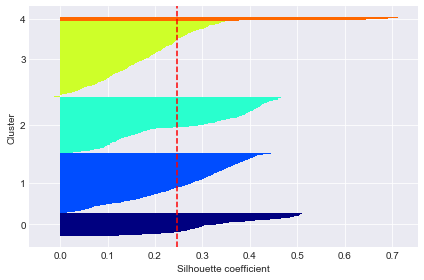

In [400]:
Silhouette(norm_Final_clust, cluster)

In [401]:
# Homogeneity and completeness test:

from sklearn.metrics import completeness_score, homogeneity_score

In [402]:
print(completeness_score(cluster_class[0], cluster))

0.0050021240732


In [403]:
print(homogeneity_score(cluster_class[0], cluster))

0.00841712940874


One more run with increase in number of clusters to see the performance

In [405]:
# Let us see what happens if we increase the clusters 

In [406]:
kmeans_house = KMeans(n_clusters = 8, max_iter=500, verbose = 1)

In [407]:
kmeans_house.fit(norm_Final_clust)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 583.149813964
start iteration
done sorting
end inner loop
Iteration 1, inertia 549.868240127
start iteration
done sorting
end inner loop
Iteration 2, inertia 545.194666501
start iteration
done sorting
end inner loop
Iteration 3, inertia 544.12920484
start iteration
done sorting
end inner loop
Iteration 4, inertia 543.677549864
start iteration
done sorting
end inner loop
Iteration 5, inertia 543.581133913
start iteration
done sorting
end inner loop
Iteration 6, inertia 543.558919489
start iteration
done sorting
end inner loop
Iteration 7, inertia 543.546891005
start iteration
done sorting
end inner loop
Iteration 8, inertia 543.540830099
start iteration
done sorting
end inner loop
Iteration 9, inertia 543.528257368
start iteration
done sorting
end inner loop
Iteration 10, inertia 543.511530913
start iteration
done sorting
end inner loop
Iteration 11, inertia 543.501345915
start iteration
done sortin

Iteration 20, inertia 487.170990686
start iteration
done sorting
end inner loop
Iteration 21, inertia 487.099292979
start iteration
done sorting
end inner loop
Iteration 22, inertia 486.996639396
start iteration
done sorting
end inner loop
Iteration 23, inertia 486.809791437
start iteration
done sorting
end inner loop
Iteration 24, inertia 486.556454994
start iteration
done sorting
end inner loop
Iteration 25, inertia 486.392541691
start iteration
done sorting
end inner loop
Iteration 26, inertia 486.348955707
start iteration
done sorting
end inner loop
Iteration 27, inertia 486.316189765
start iteration
done sorting
end inner loop
Iteration 28, inertia 486.289057626
start iteration
done sorting
end inner loop
Iteration 29, inertia 486.165055515
start iteration
done sorting
end inner loop
Iteration 30, inertia 485.964195483
start iteration
done sorting
end inner loop
Iteration 31, inertia 485.575668018
start iteration
done sorting
end inner loop
Iteration 32, inertia 485.031600234
star

Iteration 32, inertia 483.87836352
start iteration
done sorting
end inner loop
Iteration 33, inertia 483.638461783
start iteration
done sorting
end inner loop
Iteration 34, inertia 483.528797046
start iteration
done sorting
end inner loop
Iteration 35, inertia 483.469598706
start iteration
done sorting
end inner loop
Iteration 36, inertia 483.433232616
start iteration
done sorting
end inner loop
Iteration 37, inertia 483.416924742
start iteration
done sorting
end inner loop
Iteration 38, inertia 483.408835442
start iteration
done sorting
end inner loop
Iteration 39, inertia 483.407052815
center shift 7.113922e-04 within tolerance 1.067751e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 536.504380178
start iteration
done sorting
end inner loop
Iteration 1, inertia 518.090645745
start iteration
done sorting
end inner loop
Iteration 2, inertia 513.140278839
start iteration
done sorting
end inner loop
Iteration 3, inertia 510.555218891
start ite

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [408]:
cluster = kmeans_house.predict(norm_Final_clust)

In [409]:
pd.options.display.float_format='{:,.2f}'.format

centroid = pd.DataFrame(kmeans_house.cluster_centers_, columns = norm_Final_clust.columns)
centroid

,Rooms,Postcode,Bathroom,Car,YearBuilt,Propertycount
0,0.13,0.18,0.11,0.06,0.84,0.18
1,0.13,0.13,0.12,0.06,0.85,0.68
2,0.11,0.06,0.10,0.06,0.85,0.96
3,0.17,0.81,0.15,0.07,0.87,0.34
4,0.21,0.12,0.20,0.08,0.85,0.29
5,0.13,0.12,0.12,0.06,0.84,0.47
6,0.11,0.07,0.10,0.05,0.84,0.29
7,0.13,0.06,0.11,0.06,0.85,0.12


In [410]:
def size_cluster(cluster):
    size = {}
    cluster_label = np.unique(cluster)
    n_cluster = cluster_label.shape[0]
    
    for clust in cluster_label:
        size[clust] = len(norm_Final_clust[cluster == clust])
    return size

In [411]:
size = size_cluster(cluster)

for clust in size.keys():
    print("Size pf cluster", clust, '=', size[clust])

Size pf cluster 0 = 4926
Size pf cluster 1 = 3498
Size pf cluster 2 = 1046
Size pf cluster 3 = 558
Size pf cluster 4 = 4334
Size pf cluster 5 = 7775
Size pf cluster 6 = 7056
Size pf cluster 7 = 5661


In [412]:
silhouettes_method = metrics.silhouette_samples(norm_Final_clust, cluster)
print(silhouettes_method[:20])

[ 0.12431101  0.12431101  0.07263287  0.20902909  0.14817333  0.20902909
  0.18191409  0.15835456  0.09325871  0.10941826  0.09955548  0.15622281
  0.12925631  0.11148992  0.08607676  0.21376376  0.12431101  0.02826419
  0.09325871  0.12431101]


In [413]:
print(silhouettes_method.mean())

0.252915692335


In [414]:
# Now we will plot the clusters on Silhouettes plot
def Silhouette(norm_Final_clust, cluster, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    
    cluster_labels = np.unique(cluster)
    n_clusters = cluster_labels.shape[0]
    silhouette_values = metrics.silhouette_samples(norm_Final_clust, cluster, metric = 'euclidean')
    cluster_ax_lower, cluster_ax_upper = 0,0
    cluster_ticks = []
    
    for a, b in enumerate(cluster_labels):
        
        cluster_silhouette_values = silhouette_values[cluster == b]
        cluster_silhouette_values.sort()
        cluster_ax_upper += len(cluster_silhouette_values)
        color = cm.jet(float(a)/n_clusters)
        pl.barh(range(cluster_ax_lower, cluster_ax_upper), cluster_silhouette_values, height = 1.0,
                edgecolor = 'none', color = color)
        
        
        cluster_ticks.append((cluster_ax_lower + cluster_ax_upper) / 2)
        cluster_ax_lower += len(cluster_silhouette_values)
    
    silhouette_average = np.mean(silhouette_values)
    pl.axvline(silhouette_average, color = 'red', linestyle = '--')
    
    pl.yticks(cluster_ticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')
    
    pl.tight_layout()
    pl.show()
    
    return

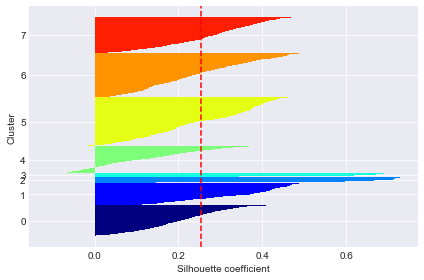

In [415]:
Silhouette(norm_Final_clust, cluster)

In [416]:
# Homogeneity and completeness test:

from sklearn.metrics import completeness_score, homogeneity_score

In [417]:
print(completeness_score(cluster_class[0], cluster))

0.0214161669085


In [418]:
print(homogeneity_score(cluster_class[0], cluster))

0.0494860951062
